In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:85% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

## 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 loss와 acc 시각화
# quiz에서는 scaler조정, train_test_split 등을 추가

In [3]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [4]:
print('타겟 :', data[0,0])
# print('이미지(28*28을 1차원으로) :', data[0, 1:].reshape(28,28))

타겟 : 5.0


In [5]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

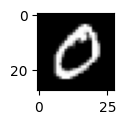

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [22]:
%pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/46.2 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 5.0/46.2 MB 11.6 MB/s eta 0:00:04
   ------ --------------------------------- 7.3/46.2 MB 11.6 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/46.2 MB 11.7 MB/s eta 0:00:04
   -------- ------------------------------- 9.4/46.2 MB 11.7 MB/s eta 0:00:04
   ---------- ----------------------------- 12.1/46.2 MB 9.4 MB/s eta 0:00:04
   ------------ --------------------------- 14.4/46.2 MB 9.7 MB/s eta 0:00:04
   -------------- ------------------------- 17.0/46.2 MB 10.0 MB/s eta 0:00:03
   ---------------- ----------------------- 19.1/46.2 MB 10.2 MB/s eta 0:00:03
   ------------------ --------------------- 21.8/46.2 MB 10.3 MB/s eta 0:00:03
   -------------------- ------------------- 24.1/46.2 MB 10.5 MB/s eta 0:00:03
   ----------------------- ---------------- 26.7/46.2 MB 10.6 MB/s e

In [23]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/39.5 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/39.5 MB 11.9 MB/s eta 0:00:03
   ------- -------------------------------- 7.1/39.5 MB 11.8 MB/s eta 0:00:03
   --------- ------------------------------ 9.7/39.5 MB 11.8 MB/s eta 0:00:03
   ------------ --------------------------- 12.1/39.5 MB 11.8 MB/s eta 0:00:03
   -------------- ------------------------- 14.7/39.5 MB 11.8 MB/s eta 0:00:03
   ----------------- ---------------------- 17.0/39.5 MB 11.8 MB/s eta 0:00:02
   ------------------- -------------------- 19.4/39.5 MB 11.9 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/39.5 MB 11.9 MB/s eta 0:00:02
   ------------------------ --------------- 24.4/39.5 MB 11.9 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/39.5 MB 11.8 MB/s eta 0:00:02
   ----------------------------- ---------- 29.4/39.5 MB 11.9 MB/

In [24]:
# 칼라사진 -> 흑백모드의 넘파이 배열로
import cv2
image_gray = cv2.imread('C:/Users/Admin/Downloads/sample.jpg', cv2.IMREAD_GRAYSCALE) #흑백포맷으로 읽기
print(image_gray.shape)
print(type(image_gray))

(408, 612)
<class 'numpy.ndarray'>


# 1. 데이터 생성 및 전처리

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [13]:
mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [31]:
print(y_train[0])
for row in X_train[0]:    
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

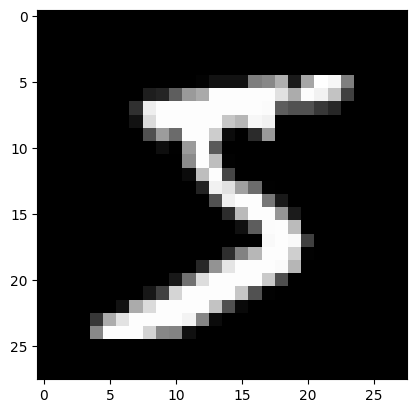

In [17]:
plt.imshow(X_train[0], cmap='gray')

In [33]:
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [35]:
# 학습셋(5만개 : fit용), 검증셋(만: fit용), 테스트셋(만: 평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [62]:
# 입력변수(독립)변수 (n, 28,28) -> (n, 784) -> 실수형 변환 -> 스케일조정(255.0으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [67]:
# 훈련셋5만개 -> 700개, 테스트셋1만개 -> 300개 추출(목적 : 학습시간 절약), 테스트셋은 그대로
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
train_X.shape, y_train.shape, val_X.shape, y_val.shape

IndexError: index 24586 is out of bounds for axis 0 with size 700

In [75]:
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
print(y_train[:2])
print(train_Y[:2])

[8 2]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [77]:
# 데이터 처리 전 작업
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, y_train.shape, val_X.shape, y_val.shape, test_X.shape, test_Y.shape

((700, 784), (700,), (300, 784), (300,), (10000, 784), (10000, 10))

# 2. 모델구성

In [78]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [80]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])

# 4. 모델 학습

In [81]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 30ms/step - loss: 2.2862 - accuracy: 0.1271 - val_loss: 2.2617 - val_accuracy: 0.1633
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2586 - accuracy: 0.1414 - val_loss: 2.2393 - val_accuracy: 0.1567
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 2.2401 - accuracy: 0.1500 - val_loss: 2.2190 - val_accuracy: 0.1767
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2168 - accuracy: 0.1800 - val_loss: 2.1917 - val_accuracy: 0.2233
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1936 - accuracy: 0.1929 - val_loss: 2.1613 - val_accuracy: 0.2300
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1663 - accuracy: 0.2071 - val_loss: 2.1357 - val_accuracy: 0.2367
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 2.1412 - accuracy: 0.2214 - val_loss: 2.1099 - val_accuracy: 0.2400
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 7ms/step - loss: 1.5528 - accuracy: 0.4486 - val_loss: 1.5645 - val_accuracy: 0.4900
Epoch 60/500
7/7 [==============================] - 0s 7ms/step - loss: 1.5465 - accuracy: 0.4514 - val_loss: 1.5584 - val_accuracy: 0.4933
Epoch 61/500
7/7 [==============================] - 0s 7ms/step - loss: 1.5397 - accuracy: 0.4514 - val_loss: 1.5524 - val_accuracy: 0.4867
Epoch 62/500
7/7 [==============================] - 0s 8ms/step - loss: 1.5329 - accuracy: 0.4571 - val_loss: 1.5471 - val_accuracy: 0.4867
Epoch 63/500
7/7 [==============================] - 0s 7ms/step - loss: 1.5264 - accuracy: 0.4571 - val_loss: 1.5422 - val_accuracy: 0.4967
Epoch 64/500
7/7 [==============================] - 0s 7ms/step - loss: 1.5207 - accuracy: 0.4614 - val_loss: 1.5369 - val_accuracy: 0.5067
Epoch 65/500
7/7 [==============================] - 0s 7ms/step - loss: 1.5146 - accuracy: 0.4629 - val_loss: 1.5313 - val_accuracy: 0.5067
Epoch 66/500
7/7 [===============

7/7 [==============================] - 0s 7ms/step - loss: 1.2986 - accuracy: 0.5429 - val_loss: 1.3591 - val_accuracy: 0.5700
Epoch 118/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2958 - accuracy: 0.5471 - val_loss: 1.3565 - val_accuracy: 0.5533
Epoch 119/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2927 - accuracy: 0.5429 - val_loss: 1.3544 - val_accuracy: 0.5600
Epoch 120/500
7/7 [==============================] - 0s 6ms/step - loss: 1.2897 - accuracy: 0.5500 - val_loss: 1.3524 - val_accuracy: 0.5600
Epoch 121/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2873 - accuracy: 0.5543 - val_loss: 1.3508 - val_accuracy: 0.5700
Epoch 122/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2836 - accuracy: 0.5543 - val_loss: 1.3481 - val_accuracy: 0.5733
Epoch 123/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2813 - accuracy: 0.5557 - val_loss: 1.3466 - val_accuracy: 0.5633
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 8ms/step - loss: 1.1369 - accuracy: 0.6514 - val_loss: 1.2494 - val_accuracy: 0.6033
Epoch 176/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1341 - accuracy: 0.6543 - val_loss: 1.2482 - val_accuracy: 0.6033
Epoch 177/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1315 - accuracy: 0.6557 - val_loss: 1.2460 - val_accuracy: 0.6100
Epoch 178/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1286 - accuracy: 0.6600 - val_loss: 1.2432 - val_accuracy: 0.6067
Epoch 179/500
7/7 [==============================] - 0s 6ms/step - loss: 1.1261 - accuracy: 0.6614 - val_loss: 1.2419 - val_accuracy: 0.6167
Epoch 180/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1233 - accuracy: 0.6586 - val_loss: 1.2397 - val_accuracy: 0.6133
Epoch 181/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1208 - accuracy: 0.6629 - val_loss: 1.2369 - val_accuracy: 0.6000
Epoch 182/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 1.0070 - accuracy: 0.7114 - val_loss: 1.1678 - val_accuracy: 0.6167
Epoch 234/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0055 - accuracy: 0.7086 - val_loss: 1.1664 - val_accuracy: 0.6267
Epoch 235/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0040 - accuracy: 0.7100 - val_loss: 1.1652 - val_accuracy: 0.6167
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0019 - accuracy: 0.7157 - val_loss: 1.1657 - val_accuracy: 0.6200
Epoch 237/500
7/7 [==============================] - 0s 6ms/step - loss: 1.0004 - accuracy: 0.7114 - val_loss: 1.1646 - val_accuracy: 0.6200
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9985 - accuracy: 0.7143 - val_loss: 1.1635 - val_accuracy: 0.6233
Epoch 239/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9968 - accuracy: 0.7129 - val_loss: 1.1626 - val_accuracy: 0.6200
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.9197 - accuracy: 0.7557 - val_loss: 1.1321 - val_accuracy: 0.6233
Epoch 292/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9185 - accuracy: 0.7543 - val_loss: 1.1318 - val_accuracy: 0.6267
Epoch 293/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9169 - accuracy: 0.7557 - val_loss: 1.1314 - val_accuracy: 0.6233
Epoch 294/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9163 - accuracy: 0.7543 - val_loss: 1.1309 - val_accuracy: 0.6333
Epoch 295/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9147 - accuracy: 0.7557 - val_loss: 1.1304 - val_accuracy: 0.6233
Epoch 296/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9143 - accuracy: 0.7543 - val_loss: 1.1293 - val_accuracy: 0.6333
Epoch 297/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9117 - accuracy: 0.7557 - val_loss: 1.1312 - val_accuracy: 0.6300
Epoch 298/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.8521 - accuracy: 0.7671 - val_loss: 1.1185 - val_accuracy: 0.6500
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8507 - accuracy: 0.7657 - val_loss: 1.1172 - val_accuracy: 0.6533
Epoch 351/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8498 - accuracy: 0.7629 - val_loss: 1.1165 - val_accuracy: 0.6533
Epoch 352/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8480 - accuracy: 0.7657 - val_loss: 1.1179 - val_accuracy: 0.6533
Epoch 353/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8473 - accuracy: 0.7643 - val_loss: 1.1163 - val_accuracy: 0.6500
Epoch 354/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8457 - accuracy: 0.7686 - val_loss: 1.1171 - val_accuracy: 0.6500
Epoch 355/500
7/7 [==============================] - 0s 6ms/step - loss: 0.8446 - accuracy: 0.7700 - val_loss: 1.1168 - val_accuracy: 0.6533
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 7ms/step - loss: 0.7953 - accuracy: 0.7771 - val_loss: 1.1156 - val_accuracy: 0.6600
Epoch 408/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7943 - accuracy: 0.7771 - val_loss: 1.1161 - val_accuracy: 0.6533
Epoch 409/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7935 - accuracy: 0.7786 - val_loss: 1.1161 - val_accuracy: 0.6567
Epoch 410/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7923 - accuracy: 0.7800 - val_loss: 1.1163 - val_accuracy: 0.6600
Epoch 411/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7917 - accuracy: 0.7800 - val_loss: 1.1169 - val_accuracy: 0.6533
Epoch 412/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7906 - accuracy: 0.7771 - val_loss: 1.1164 - val_accuracy: 0.6567
Epoch 413/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7897 - accuracy: 0.7786 - val_loss: 1.1165 - val_accuracy: 0.6633
Epoch 414/500
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.7484 - accuracy: 0.7943 - val_loss: 1.1247 - val_accuracy: 0.6600
Epoch 466/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7477 - accuracy: 0.7929 - val_loss: 1.1249 - val_accuracy: 0.6567
Epoch 467/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7471 - accuracy: 0.7943 - val_loss: 1.1254 - val_accuracy: 0.6567
Epoch 468/500
7/7 [==============================] - 0s 7ms/step - loss: 0.7468 - accuracy: 0.7943 - val_loss: 1.1256 - val_accuracy: 0.6533
Epoch 469/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7457 - accuracy: 0.7914 - val_loss: 1.1254 - val_accuracy: 0.6600
Epoch 470/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7450 - accuracy: 0.7914 - val_loss: 1.1256 - val_accuracy: 0.6600
Epoch 471/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7441 - accuracy: 0.7943 - val_loss: 1.1256 - val_accuracy: 0.6600
Epoch 472/500
7/7 [========

In [82]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

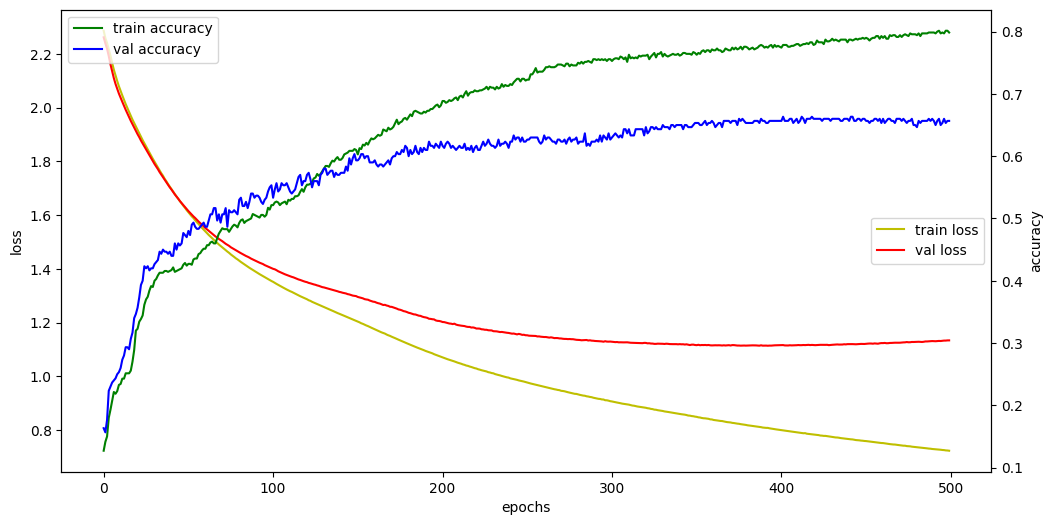

In [83]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [85]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[0])

loss : 1.5019729137420654
accuracy : 1.5019729137420654


# 위 모델(DNN)의 accuracy 늘리기
- 데이터 확보
- 모델 수정(레이어 추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수)
- epoch 조정
- optimizer 변경

Epoch 1/50
500/500 [==============================] - 14s 27ms/step - loss: 0.2735 - accuracy: 0.9160 - val_loss: 0.1125 - val_accuracy: 0.9671
Epoch 2/50
500/500 [==============================] - 14s 27ms/step - loss: 0.1228 - accuracy: 0.9629 - val_loss: 0.0946 - val_accuracy: 0.9714
Epoch 3/50
500/500 [==============================] - 14s 27ms/step - loss: 0.0975 - accuracy: 0.9699 - val_loss: 0.0870 - val_accuracy: 0.9749
Epoch 4/50
500/500 [==============================] - 14s 27ms/step - loss: 0.0768 - accuracy: 0.9760 - val_loss: 0.0873 - val_accuracy: 0.9748
Epoch 5/50
500/500 [==============================] - 14s 27ms/step - loss: 0.0707 - accuracy: 0.9777 - val_loss: 0.0839 - val_accuracy: 0.9783
Epoch 6/50
500/500 [==============================] - 14s 28ms/step - loss: 0.0611 - accuracy: 0.9808 - val_loss: 0.0823 - val_accuracy: 0.9790
Epoch 7/50
500/500 [==============================] - 15s 29ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0768 - val_accuracy:

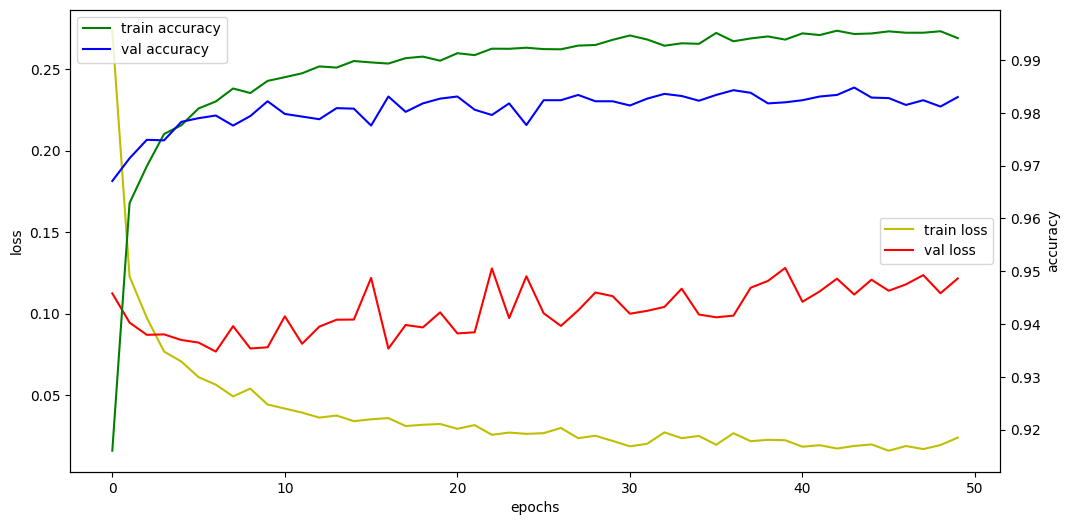

CPU times: total: 1h 6min 43s
Wall time: 12min 17s


In [92]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 700)
# val_idx  = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [93]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.10428112745285034
accuracy : 0.9836999773979187


In [98]:
# 실제값
test_Y.argmax(axis=1) == y_test

array([ True,  True,  True, ...,  True,  True,  True])

In [100]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 1s 4ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [101]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,965,1,0,2,0,0,9,1,0,2
1,0,1128,1,3,0,0,1,0,2,0
2,0,0,1018,2,1,0,2,5,3,1
3,0,0,1,994,0,4,0,5,1,5
4,1,1,2,0,957,0,7,1,1,12
5,1,0,0,9,0,874,5,0,2,1
6,0,2,0,1,2,1,951,0,1,0
7,0,0,7,2,0,0,1,1014,1,3
8,0,0,1,13,0,1,3,5,950,1


In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[ 965,    1,    0,    2,    0,    0,    9,    1,    0,    2],
       [   0, 1128,    1,    3,    0,    0,    1,    0,    2,    0],
       [   0,    0, 1018,    2,    1,    0,    2,    5,    3,    1],
       [   0,    0,    1,  994,    0,    4,    0,    5,    1,    5],
       [   1,    1,    2,    0,  957,    0,    7,    1,    1,   12],
       [   1,    0,    0,    9,    0,  874,    5,    0,    2,    1],
       [   0,    2,    0,    1,    2,    1,  951,    0,    1,    0],
       [   0,    0,    7,    2,    0,    0,    1, 1014,    1,    3],
       [   0,    0,    1,   13,    0,    1,    3,    5,  950,    1],
       [   1,    2,    0,    5,    7,    4,    0,    4,    0,  986]],
      dtype=int64)

In [109]:
# 틀린 갯수 :
10000- 10000*loss_and_metrics[1]

163.000226020813

In [105]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('틀린 갯수 :', cnt)

틀린 갯수 : 163


In [107]:
# 모델 저장
model.save('model/08_mnist.h5')

# 콜백함수1 : 로그 출력

In [110]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [113]:
%%time
# 매번 로그 출력하면 지저분해 질 수 있으니, 특정 에포크마다 로그 출력하도록 제한
class CustomHistory(Callback):
    def __init__(self): # 생성자함수
        self.epoch = 0
    def on_epoch_end(self, batch, logs={}) : # 1 epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch값을 1씩 증가
        if self.epoch%10 == 0:
            print('epoch:{}, loss:{}, acc:{}, val_loss:{}, val_acc:{}'.\
                  format(self.epoch, 
                        logs.get('loss'),
                        logs.get('accuracy', '-'),
                        logs.get('val_loss', '-'),
                        logs.get('val_accuracy', '-')
                  )
            )
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
customHistory = CustomHistory()
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0,
                callbacks=[customHistory]) # 콜백함수

epoch:10, loss:2.098022699356079, acc:0.272857129573822, val_loss:2.100365400314331, val_acc:0.25333333015441895
epoch:20, loss:1.9774444103240967, acc:0.30571427941322327, val_loss:1.991353154182434, val_acc:0.28999999165534973
epoch:30, loss:1.8805214166641235, acc:0.334285706281662, val_loss:1.904778242111206, val_acc:0.31333333253860474
epoch:40, loss:1.7942848205566406, acc:0.4099999964237213, val_loss:1.8341662883758545, val_acc:0.3566666543483734
epoch:50, loss:1.717317819595337, acc:0.41857144236564636, val_loss:1.7729134559631348, val_acc:0.3700000047683716
CPU times: total: 3.41 s
Wall time: 2.67 s


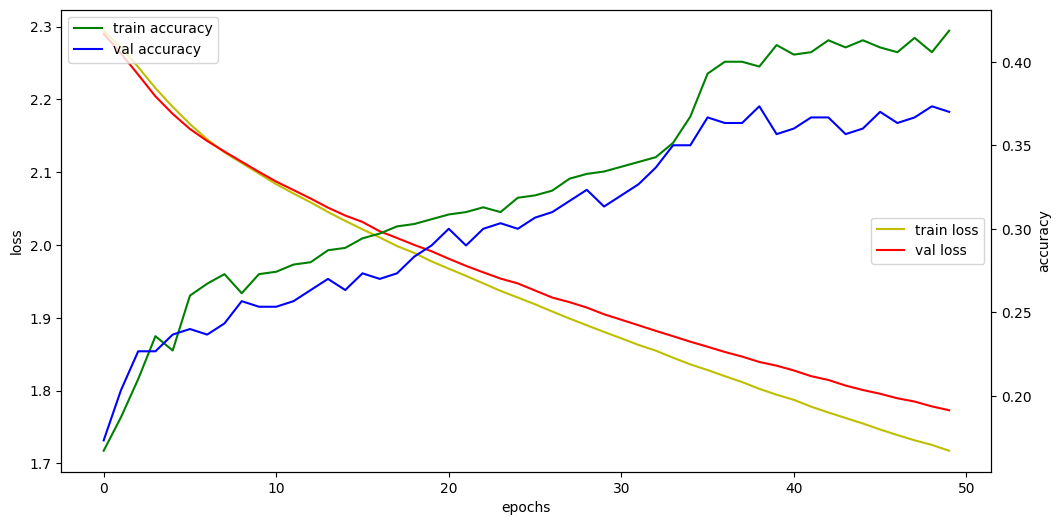

In [114]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# ※ 콜백함수 2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [116]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 24ms/step - loss: 2.3058 - accuracy: 0.1057 - val_loss: 2.2962 - val_accuracy: 0.1000
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 2.2628 - accuracy: 0.1543 - val_loss: 2.2551 - val_accuracy: 0.1767
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 2.2270 - accuracy: 0.2014 - val_loss: 2.2228 - val_accuracy: 0.1900
Epoch 4/500
7/7 [==============================] - 0s 8ms/step - loss: 2.1947 - accuracy: 0.2043 - val_loss: 2.1914 - val_accuracy: 0.2100
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1628 - accuracy: 0.2343 - val_loss: 2.1644 - val_accuracy: 0.2233
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1355 - accuracy: 0.2529 - val_loss: 2.1397 - val_accuracy: 0.2100
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 2.1105 - accuracy: 0.2529 - val_loss: 2.1159 - val_accuracy: 0.2133


# ※ 콜백함수 3 : ModelCheckpoint
- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [117]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10)
# 모델 자동 저장하는 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'
    
checkpoint = ModelCheckpoint(filepath=file, # 저장경로
                            monitor='val_accuracy', #모니터할 지표
                            save_best_only=True, # 모니터링 지표가 개선된 경우만 저장
                            mode = 'max', # 값이 클수록 저장
                            verbose=1 # 저장시 로그 출력
                            )

hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlystopping, checkpoint]) # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 2s - loss: 2.3717 - accuracy: 0.0600
Epoch 1: val_accuracy improved from -inf to 0.08667, saving model to ./model08\mnist-001-val0.0867.h5
7/7 [==============================] - 1s 28ms/step - loss: 2.3260 - accuracy: 0.1000 - val_loss: 2.3278 - val_accuracy: 0.0867
Epoch 2/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2929 - accuracy: 0.1100
Epoch 2: val_accuracy improved from 0.08667 to 0.11667, saving model to ./model08\mnist-002-val0.1167.h5
7/7 [==============================] - 0s 10ms/step - loss: 2.2942 - accuracy: 0.1357 - val_loss: 2.2985 - val_accuracy: 0.1167
Epoch 3/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2389 - accuracy: 0.1900
Epoch 3: val_accuracy did not improve from 0.11667
7/7 [==============================] - 0s 7ms/step - loss: 2.2683 - accuracy: 0.1429 - val_loss: 2.2763 - val_accuracy: 0.1100
Epoch 4/500
1/7 [===>..........................] - ETA: 0s - loss: 2.2676 - accu

Epoch 29/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8729 - accuracy: 0.2700
Epoch 29: val_accuracy improved from 0.19667 to 0.20333, saving model to ./model08\mnist-029-val0.2033.h5
7/7 [==============================] - 0s 11ms/step - loss: 1.8816 - accuracy: 0.2571 - val_loss: 1.9538 - val_accuracy: 0.2033
Epoch 30/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8517 - accuracy: 0.2400
Epoch 30: val_accuracy did not improve from 0.20333
7/7 [==============================] - 0s 7ms/step - loss: 1.8730 - accuracy: 0.2629 - val_loss: 1.9479 - val_accuracy: 0.2000
Epoch 31/500
1/7 [===>..........................] - ETA: 0s - loss: 1.7476 - accuracy: 0.3200
Epoch 31: val_accuracy did not improve from 0.20333
7/7 [==============================] - 0s 6ms/step - loss: 1.8648 - accuracy: 0.2557 - val_loss: 1.9420 - val_accuracy: 0.2033
Epoch 32/500
1/7 [===>..........................] - ETA: 0s - loss: 1.8925 - accuracy: 0.2500
Epoch 32: val_accuracy improved 

7/7 [==============================] - 0s 9ms/step - loss: 1.7028 - accuracy: 0.3386 - val_loss: 1.8264 - val_accuracy: 0.2833
Epoch 57/500
1/7 [===>..........................] - ETA: 0s - loss: 1.7315 - accuracy: 0.3400
Epoch 57: val_accuracy did not improve from 0.28333
7/7 [==============================] - 0s 7ms/step - loss: 1.6975 - accuracy: 0.3429 - val_loss: 1.8229 - val_accuracy: 0.2767
Epoch 58/500
1/7 [===>..........................] - ETA: 0s - loss: 1.7117 - accuracy: 0.3600
Epoch 58: val_accuracy did not improve from 0.28333
7/7 [==============================] - 0s 7ms/step - loss: 1.6923 - accuracy: 0.3471 - val_loss: 1.8208 - val_accuracy: 0.2667
Epoch 59/500
1/7 [===>..........................] - ETA: 0s - loss: 1.7124 - accuracy: 0.3100
Epoch 59: val_accuracy did not improve from 0.28333
7/7 [==============================] - 0s 7ms/step - loss: 1.6872 - accuracy: 0.3543 - val_loss: 1.8166 - val_accuracy: 0.2800
Epoch 60/500
1/7 [===>..........................] - ET

Epoch 84/500
1/7 [===>..........................] - ETA: 0s - loss: 1.6136 - accuracy: 0.3800
Epoch 84: val_accuracy did not improve from 0.37333
7/7 [==============================] - 0s 8ms/step - loss: 1.5521 - accuracy: 0.4229 - val_loss: 1.7367 - val_accuracy: 0.3733
Epoch 85/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4828 - accuracy: 0.4900
Epoch 85: val_accuracy improved from 0.37333 to 0.38333, saving model to ./model08\mnist-085-val0.3833.h5
7/7 [==============================] - 0s 11ms/step - loss: 1.5464 - accuracy: 0.4271 - val_loss: 1.7329 - val_accuracy: 0.3833
Epoch 86/500
1/7 [===>..........................] - ETA: 0s - loss: 1.5918 - accuracy: 0.4500
Epoch 86: val_accuracy improved from 0.38333 to 0.39333, saving model to ./model08\mnist-086-val0.3933.h5
7/7 [==============================] - 0s 10ms/step - loss: 1.5407 - accuracy: 0.4400 - val_loss: 1.7289 - val_accuracy: 0.3933
Epoch 87/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4

7/7 [==============================] - 0s 8ms/step - loss: 1.3998 - accuracy: 0.4843 - val_loss: 1.6134 - val_accuracy: 0.4500
Epoch 112/500
1/7 [===>..........................] - ETA: 0s - loss: 1.3718 - accuracy: 0.5000
Epoch 112: val_accuracy did not improve from 0.45333
7/7 [==============================] - 0s 8ms/step - loss: 1.3944 - accuracy: 0.4971 - val_loss: 1.6106 - val_accuracy: 0.4500
Epoch 113/500
1/7 [===>..........................] - ETA: 0s - loss: 1.4678 - accuracy: 0.4700
Epoch 113: val_accuracy did not improve from 0.45333
7/7 [==============================] - 0s 9ms/step - loss: 1.3902 - accuracy: 0.4943 - val_loss: 1.6075 - val_accuracy: 0.4533
Epoch 114/500
1/7 [===>..........................] - ETA: 0s - loss: 1.3981 - accuracy: 0.5000
Epoch 114: val_accuracy did not improve from 0.45333
7/7 [==============================] - 0s 6ms/step - loss: 1.3857 - accuracy: 0.5000 - val_loss: 1.6040 - val_accuracy: 0.4367
Epoch 115/500
1/7 [===>.........................

In [118]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 1.5920 - accuracy: 0.4367


[1.5919843912124634, 0.43666666746139526]